In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df = pd.read_csv('S:\Mes documents\Bureau\PFE MID\Les articles\ElectricityTheftDetection\SmartGridFraudDetection-master\SmartGridFraudDetection-master\data\preprocessedR90.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) 

df

,CONS_NO,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
FLAG,,,,,,,,,,,,,,,,,,,,,
0,006236D78A8B8574A0620FEA9D267920,0.260820,0.250910,0.198884,0.209206,0.227237,0.202462,0.172595,0.204664,0.264123,...,0.409053,0.392812,0.401621,0.350971,0.328124,0.351797,0.424469,0.352347,0.261783,0.357853
0,37E5FC6D436B49AF65FF87A3642823D0,0.500396,0.345868,0.344249,0.348295,0.611640,0.279526,0.472079,0.441740,0.612853,...,0.434054,0.627416,0.448617,0.496755,0.444571,0.585345,0.514554,0.424750,0.356790,0.441740
0,5F30340427C92CF2CE702B08F1B91089,0.181633,0.228898,0.187710,0.176906,0.226535,0.203240,0.174881,0.206616,0.209317,...,0.430449,0.533420,0.392637,0.442941,0.407492,0.430787,0.349424,0.446992,0.335919,0.387236
0,959687C6F0A6925AC1A9F42844DE0A2E,0.008385,0.008385,0.339508,0.390990,0.377729,0.367589,0.385334,0.387480,0.389820,...,0.004680,0.014821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,105E8F09409F6DC290B90F439CED82C8,0.123333,0.031975,0.000000,0.015988,0.047963,0.027407,0.216975,0.029691,0.036543,...,0.121049,0.089074,0.000000,0.000000,0.002284,0.018272,0.098210,0.207839,0.164444,0.331172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,121D197F422D8C5CCBEAAE5FF5418F56,0.039787,0.038471,0.042399,0.033523,0.033267,0.042929,0.030321,0.029654,0.030243,...,0.019717,0.026197,0.021249,0.019992,0.020306,0.019520,0.023370,0.030282,0.025098,0.019246
0,A17FD4E7C9EAD0838875545C802CBD54,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.219093,0.719701,1.000000,0.224600,0.465113,0.331087,0.846995,0.634634,1.000000,0.463889
0,27D3BA14DD1D10B55CD7D9CA994620A5,0.099569,0.129268,0.163109,0.020242,0.090113,0.197497,0.184758,0.124970,0.195700,...,0.343491,0.325906,0.369047,0.354276,0.337629,0.351462,0.245719,0.251815,0.217583,0.268227


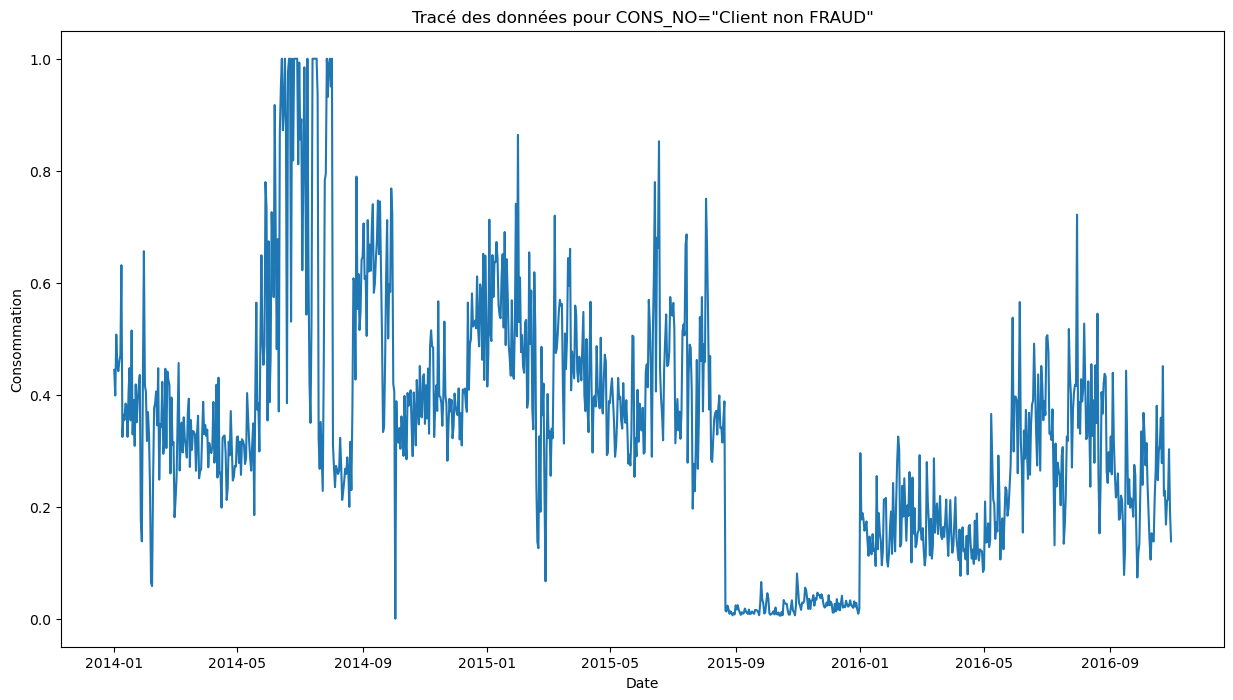

In [5]:
# Client NON FRAUD
# Transposer les données
df_transposed = df.set_index('CONS_NO').T

# Sélectionner les données à tracer (par exemple, CONS_NO='F3406636BAD1E6E0826E8EDDC9A1BF00')
selected_data = df_transposed['F3406636BAD1E6E0826E8EDDC9A1BF00']

# Convertir les index en datetime si nécessaire
selected_data.index = pd.to_datetime(selected_data.index)

# Tracer les données
plt.figure(figsize=(15, 8))
plt.plot(selected_data.index, selected_data.values)
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Tracé des données pour CONS_NO="Client non FRAUD"')
plt.show()

# stationnarité

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Vous pouvez appliquer une transformation logarithmique si nécessaire
# Pour cela, assurez-vous que toutes les valeurs de selected_data sont positives.
# selected_data_log = log(selected_data.values)

# Exécution du test ADF
result = adfuller(selected_data.values)

# Affichage des résultats
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Number of lags used: %d' % result[2])
print('Number of observations used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interprétation des résultats
if result[1] < 0.05:
    print('La série est probablement stationnaire (rejeter l\'hypothèse nulle d\'une unité racine).')
else:
    print('La série est probablement non-stationnaire (ne pas rejeter l\'hypothèse nulle).')


ADF Statistic: -2.591593

p-value: 0.094747

Number of lags used: 20

Number of observations used: 1013

Critical Values:

	1%: -3.437

	5%: -2.864

	10%: -2.568

La série est probablement non-stationnaire (ne pas rejeter l'hypothèse nulle).


¨_Value > 0.05 ===> La série temporelle n'est pas stationnaire 

In [7]:
from statsmodels.tsa.stattools import kpss

# Assurez-vous que l'index de selected_data est de type datetime
# Si ce n'est pas le cas, convertissez-le comme suit:
# selected_data.index = pd.to_datetime(selected_data.index)

# Exécution du test KPSS
statistic, p_value, n_lags, critical_values = kpss(selected_data, regression='c')

# Affichage des résultats
print(f'Statistique de test: {statistic}')
print(f'P-value: {p_value}')
print(f'Nombre de retards utilisés: {n_lags}')
print('Valeurs critiques:')
for key, value in critical_values.items():
    print(f'  {key} : {value}')

# Interprétation de la sortie
if p_value < 0.05:
    print('La série est probablement non-stationnaire (rejeter H0).')
else:
    print('La série est probablement stationnaire (ne pas rejeter H0).')


Statistique de test: 1.9792418045031277

P-value: 0.01

Nombre de retards utilisés: 19

Valeurs critiques:

  10% : 0.347

  5% : 0.463

  2.5% : 0.574

  1% : 0.739

La série est probablement non-stationnaire (rejeter H0).


# Time Series Decomposition

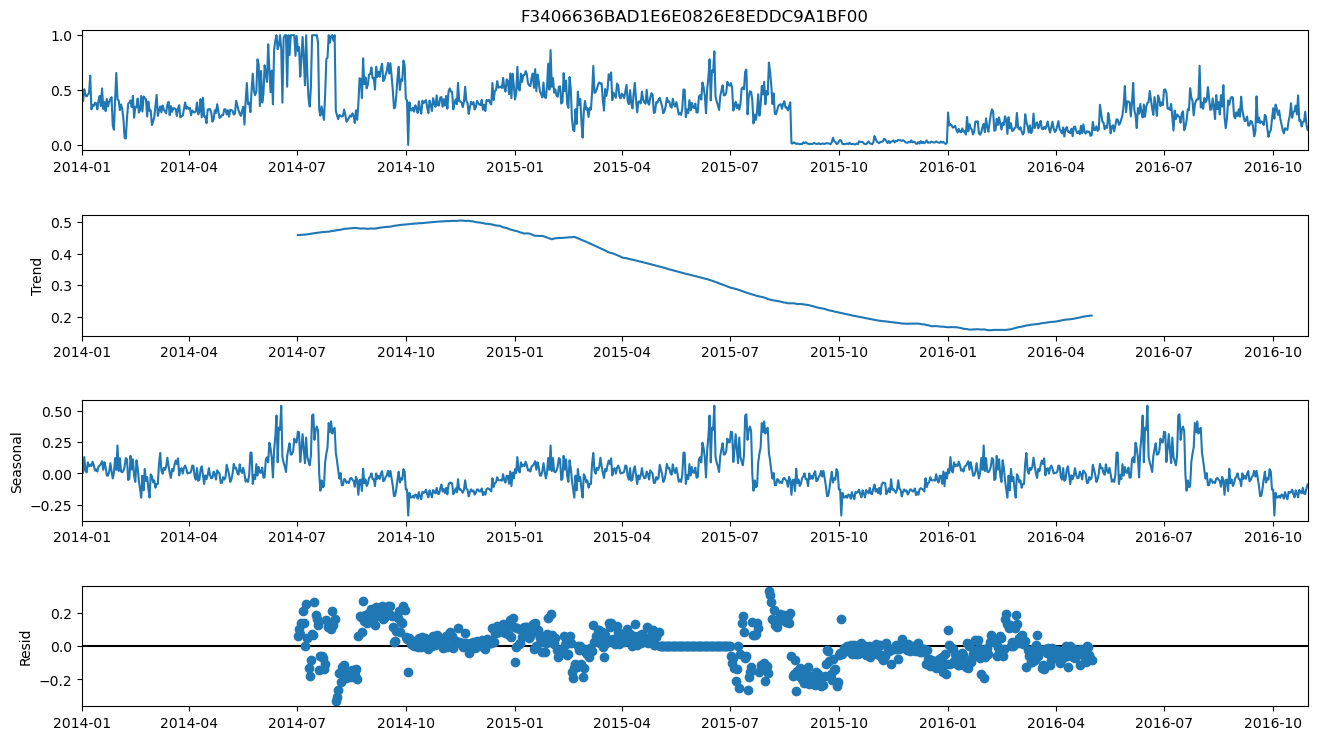

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Si selected_data est une série pandas, assurez-vous que l'index est un DatetimeIndex
selected_data.index = pd.date_range(start='2014-01-01', periods=len(selected_data), freq='D')

# Vérifiez que la fréquence est définie
selected_data = selected_data.asfreq('D')  # Assurez-vous que c'est la bonne fréquence pour vos données

# Spécifier une période si vous connaissez la saisonnalité typique de vos données
# Par exemple, si vous savez que la saisonnalité est annuelle et que les données sont quotidiennes:
period = 365

# Appliquer la décomposition additive
decomposition = seasonal_decompose(selected_data, model='additive', period=period)

# Tracer la décomposition
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

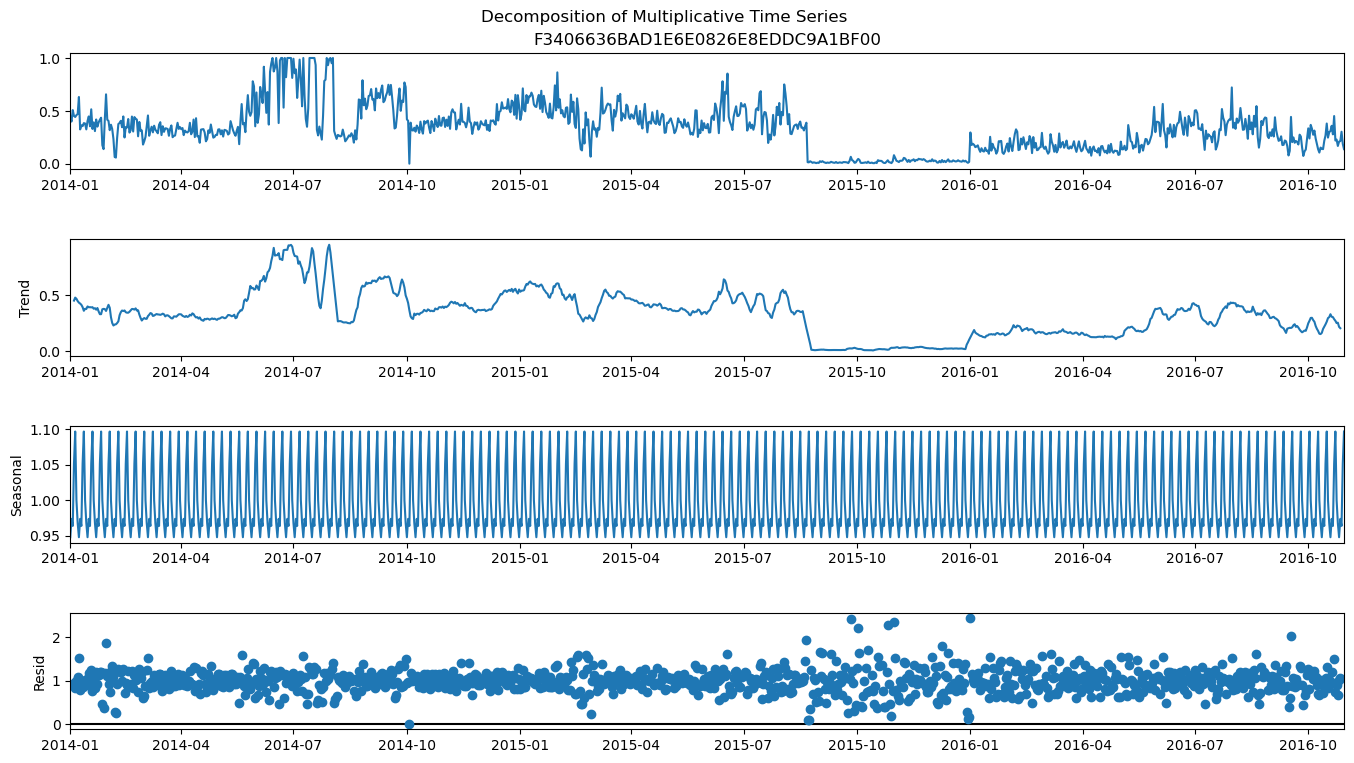

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Remplacer les valeurs zéro ou négatives par une petite valeur positive (e.g., un petit pourcentage de la moyenne des valeurs non-nulles)
min_positive = selected_data[selected_data > 0].min()
selected_data_M = selected_data.replace(0, min_positive * 0.1)
selected_data_M = selected_data.where(selected_data > 0, min_positive * 0.1)

# Appliquer la décomposition multiplicative
decomposition = sm.tsa.seasonal_decompose(selected_data_M, model='multiplicative')

# Tracer la décomposition
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(8)
fig.suptitle('Decomposition of Multiplicative Time Series')
plt.show()


# ACF PACF

<Figure size 1200x600 with 0 Axes>

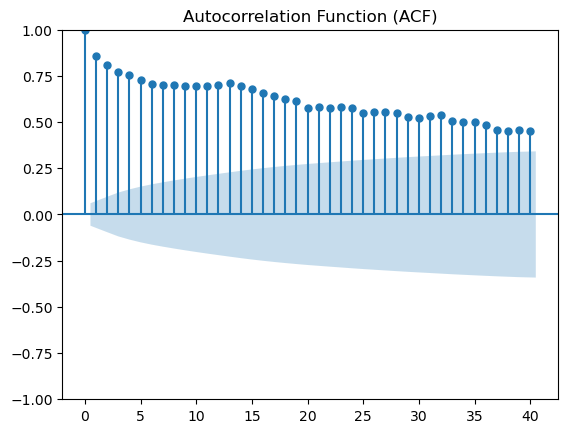

<Figure size 1200x600 with 0 Axes>

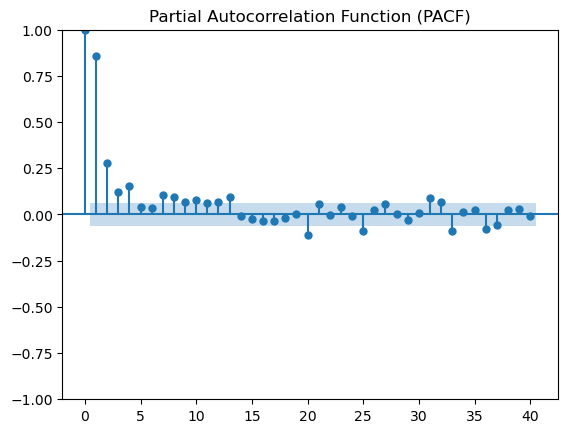

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supposons que 'selected_data' est votre série temporelle
# Assurez-vous que l'index est de type datetime si ce n'est pas déjà le cas
selected_data.index = pd.to_datetime(selected_data.index)

# Tracer l'Autocorrélation (ACF)
plt.figure(figsize=(12, 6))
plot_acf(selected_data, alpha=0.05, lags=40)  # Vous pouvez ajuster les lags en fonction de votre série
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Tracer l'Autocorrélation Partielle (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(selected_data, alpha=0.05, lags=40, method='ywm')  # 'ywm' est une méthode de calcul pour PACF
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# différenciation 

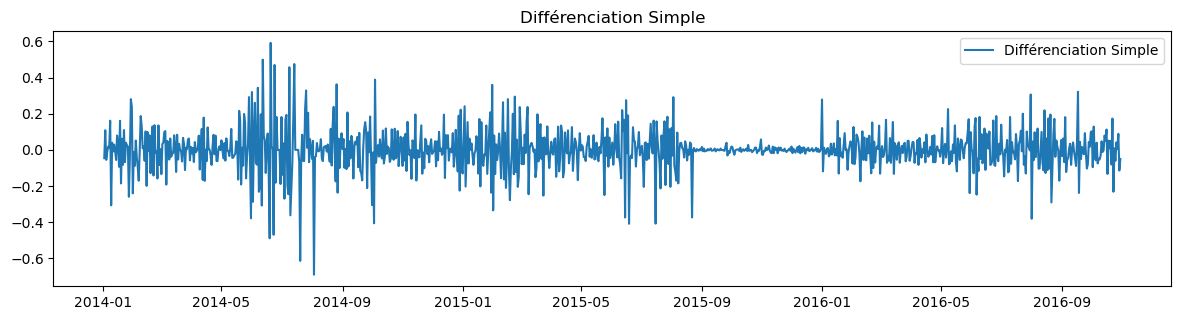

In [11]:
import pandas as pd

# Supposons que selected_data est votre série temporelle.
# Assurez-vous que selected_data est un objet pandas Series avec un DateTimeIndex.

# Différenciation Simple
diff_simple = selected_data.diff().dropna()


# Afficher les séries différenciées
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(diff_simple, label='Différenciation Simple')
plt.title('Différenciation Simple')
plt.legend()


plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Vous pouvez appliquer une transformation logarithmique si nécessaire
# Pour cela, assurez-vous que toutes les valeurs de selected_data sont positives.
# selected_data_log = log(selected_data.values)

# Exécution du test ADF
result = adfuller(diff_simple.values)

# Affichage des résultats
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Number of lags used: %d' % result[2])
print('Number of observations used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interprétation des résultats
if result[1] < 0.05:
    print('La série est probablement stationnaire (rejeter l\'hypothèse nulle d\'une unité racine).')
else:
    print('La série est probablement non-stationnaire (ne pas rejeter l\'hypothèse nulle).')

ADF Statistic: -8.172199

p-value: 0.000000

Number of lags used: 19

Number of observations used: 1013

Critical Values:

	1%: -3.437

	5%: -2.864

	10%: -2.568

La série est probablement stationnaire (rejeter l'hypothèse nulle d'une unité racine).


P_Value < 0.05 =====> Stationnaire

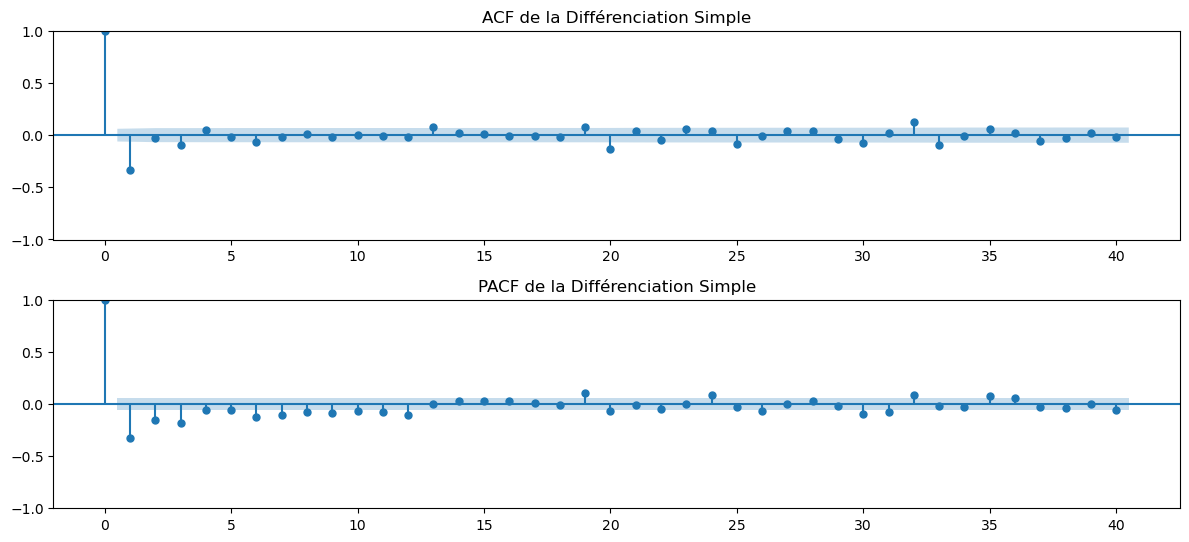

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supposons que selected_data est votre série temporelle.
# Assurez-vous que selected_data est un objet pandas Series avec un DateTimeIndex.
# Afficher les séries différenciées
plt.figure(figsize=(12, 8))

# ACF de la série différenciée
plt.subplot(312)
plot_acf(diff_simple, ax=plt.gca(), lags=40)
plt.title('ACF de la Différenciation Simple')

# PACF de la série différenciée
plt.subplot(313)
plot_pacf(diff_simple, ax=plt.gca(), lags=40)
plt.title('PACF de la Différenciation Simple')

plt.tight_layout()
plt.show()

# Determine ARIMA models parameters p, q

In [20]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Define range of p, d, q values
p_range = range(0, 5)  # Adjust based on the complexity of your data
d_range = range(0, 5)
q_range = range(0, 5)

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p_range, d_range, q_range))

# Grid search
best_aic = float("inf")
best_pdq = None
for params in pdq:
    try:
        model = ARIMA(selected_data, order=params)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_pdq = params
    except:
        continue

print("Best (p, d, q) parameters:", best_pdq)
print("Best AIC:", best_aic)

Best (p, d, q) parameters: (4, 0, 3)

Best AIC: -1753.6450441287957


Mean Absolute Error: 0.07045045718628949

Mean Squared Error: 0.010543708980102021

Root Mean Squared Error: 0.10268256414845717

R-squared: 0.7740921548184562


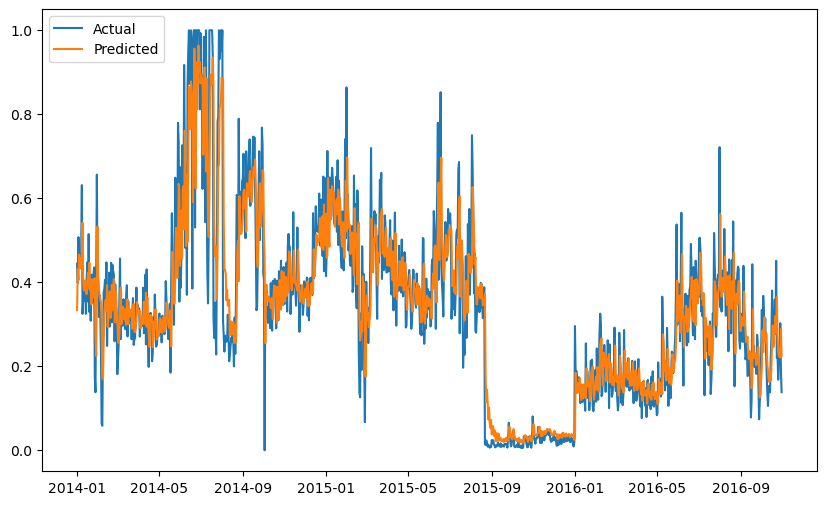

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
# Create and fit the ARIMA model

model = ARIMA(selected_data, order=(4, 0, 3))

model_fit = model.fit()

# Make predictions
start_index = 0
end_index = len(selected_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Calculate metrics
mae = mean_absolute_error(selected_data, predictions)
mse = mean_squared_error(selected_data, predictions)
rmse = sqrt(mse)
r2 = r2_score(selected_data, predictions)

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot the predictions alongside the actual values
plt.figure(figsize=(10,6))
plt.plot(selected_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [22]:
import pmdarima as pm

# Ajustement automatique du modèle ARIMA
model = pm.auto_arima(selected_data)

# Affichage du résumé du modèle
print(model.summary())


                               SARIMAX Results                                


Dep. Variable:                      y   No. Observations:                 1034

Model:               SARIMAX(2, 1, 2)   Log Likelihood                 879.511

Date:                Wed, 08 May 2024   AIC                          -1749.023

Time:                        12:55:10   BIC                          -1724.322

Sample:                    01-01-2014   HQIC                         -1739.649

                         - 10-30-2016                                         

Covariance Type:                  opg                                         


                 coef    std err          z      P>|z|      [0.025      0.975]

------------------------------------------------------------------------------

ar.L1         -0.1549      0.190     -0.816      0.415      -0.527       0.217

ar.L2          0.3188      0.071      4.514      0.000       0.180       0.457

ma.L1         -0.3042      0.194     -

Mean Absolute Error: 0.07042900854806414

Mean Squared Error: 0.010843168206041368

Root Mean Squared Error: 0.1041305344557559

R-squared: 0.7676759886876041


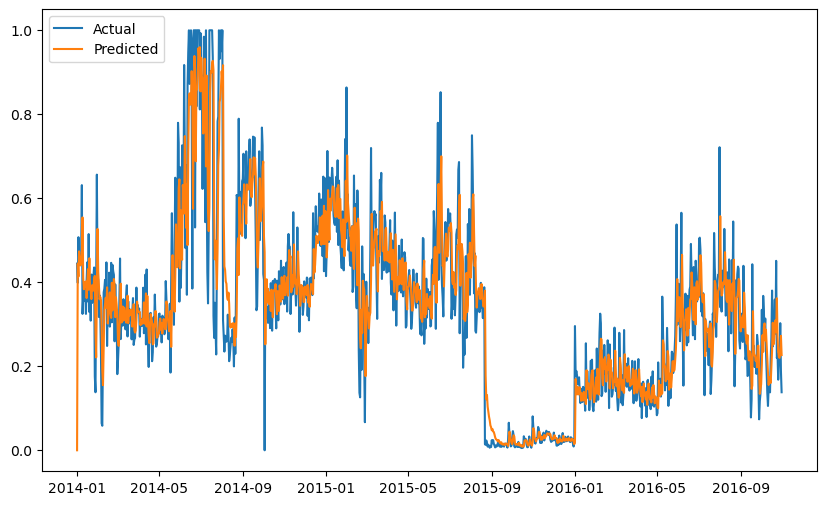

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
# Create and fit the ARIMA model
model = ARIMA(selected_data, order=(2, 1, 2))


model_fit = model.fit()

# Make predictions
start_index = 0
end_index = len(selected_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Calculate metrics
mae = mean_absolute_error(selected_data, predictions)
mse = mean_squared_error(selected_data, predictions)
rmse = sqrt(mse)
r2 = r2_score(selected_data, predictions)

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot the predictions alongside the actual values
plt.figure(figsize=(10,6))
plt.plot(selected_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()

# SARIMA

In [25]:
import pmdarima as pm

model = pm.auto_arima(selected_data, seasonal=True, m=30)
print(model.summary())


                                      SARIMAX Results                                       


Dep. Variable:                                    y   No. Observations:                 1034

Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 30)   Log Likelihood                 883.001

Date:                              Wed, 08 May 2024   AIC                          -1754.003

Time:                                      13:14:46   BIC                          -1724.361

Sample:                                  01-01-2014   HQIC                         -1742.755

                                       - 10-30-2016                                         

Covariance Type:                                opg                                         


                 coef    std err          z      P>|z|      [0.025      0.975]

------------------------------------------------------------------------------

ar.L1         -0.1339      0.173     -0.772      0.440      -0.474       0.206

ar.L2 

Mean Absolute Error: 0.06997118845665821

Mean Squared Error: 0.010771768928354651

Root Mean Squared Error: 0.10378713276873319

R-squared: 0.7692057783470271


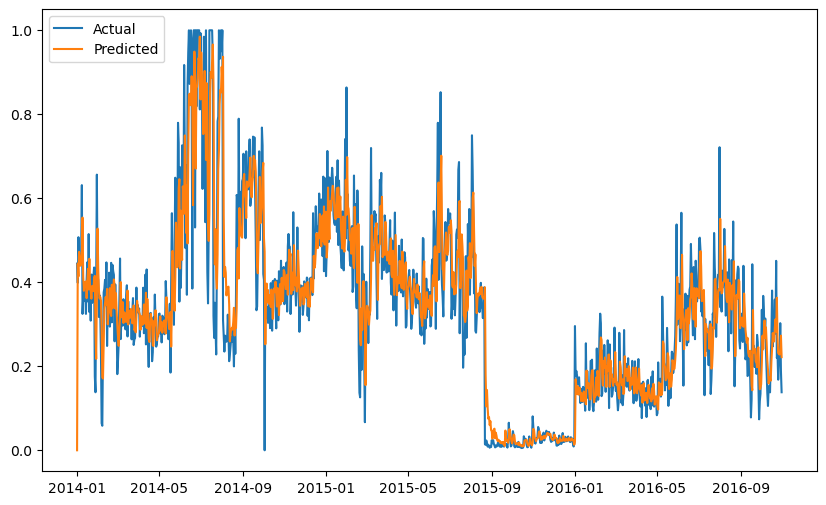

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and fit the SARIMA model
model = SARIMAX(selected_data, order=(2, 1, 2), seasonal_order=(0, 0, 1, 30))
model_fit = model.fit()

# Make predictions
start_index = 0
end_index = len(selected_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Calculate metrics
mae = mean_absolute_error(selected_data, predictions)
mse = mean_squared_error(selected_data, predictions)
rmse = sqrt(mse)
r2 = r2_score(selected_data, predictions)

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot the predictions alongside the actual values
plt.figure(figsize=(10,6))
plt.plot(selected_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()